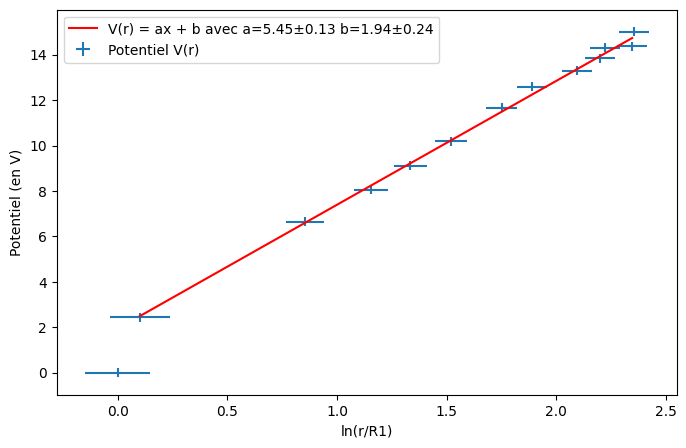

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from uncertainties import unumpy
from uncertainties import *

V = unumpy.uarray([0, 2.43, 6.65, 8.054, 9.115, 10.187, 11.656, 12.590, 13.300, 13.846, 14.300, 14.366, 15.007], 0.2)

r = unumpy.uarray([0.75, 0.83, 1.76, 2.38, 2.85, 3.43, 4.32, 4.96, 6.09, 6.76, 6.94, 7.84, 7.90], 0.1)

R_1 = ufloat(0.75, 0.05)
R_2 = ufloat(8, 0.05)

log_r = unumpy.log(r/R_1)

def linear(x, C, V_0):
    return C * x + V_0

param ,pcov = curve_fit(linear, unumpy.nominal_values(log_r)[1:-1], unumpy.nominal_values(V)[1:-1], sigma = unumpy.std_devs(log_r)[1:-1])
(C_exp, V_0_exp) = (param[0], param[1])
incer_exp = np.sqrt(np.diag(pcov))
(C_exp_err, V_0_exp_err) = (incer_exp[0], incer_exp[1])

x_axis = unumpy.nominal_values(log_r)[1:-1]

plt.rcParams['figure.figsize']=[8,5]
plt.errorbar(unumpy.nominal_values(log_r), unumpy.nominal_values(V), xerr=unumpy.std_devs(log_r), yerr=unumpy.std_devs(V), label="Potentiel V(r)", fmt='None')
plt.plot(x_axis, linear(x_axis, C_exp, V_0_exp), label=f"V(r) = ax + b avec a={C_exp:.2f}±{C_exp_err:.2f} b={V_0_exp:.2f}±{V_0_exp_err:.2f}", c="red")
plt.xlabel("ln(r/R1)")
plt.ylabel("Potentiel (en V)")
plt.legend()
plt.savefig("ln_r.png")

In [41]:
(V[-1] - V[1])/unumpy.log(R_2 / R_1)

5.313199498714769+/-0.1920049725707799